# Old School T, Chi Squared, and F Charts

## Introduction
I had an idle whim while reading a very old introduction to statistics book (_Facts from Figures_, M. J. Moroney), "I wonder if I can create the various charts shown in the book" - some are hand drawn!.  This from the days when reading a value off a chart was the preferred way to get a function value.

It actually taught me a lot about Matplotlib, and how to manage the appearence of a graphic!


-----
## Initialize Environment

Load up my Python formatter (```black```) and environment documentor (```watermark```)

In [2]:
%load_ext watermark

In [3]:
%reload_ext lab_black

In [4]:
%matplotlib inline

All imports go here.

In [87]:
import pandas as pd
import numpy as np
import seaborn as sn

import matplotlib.pyplot as plt


from matplotlib.ticker import FormatStrFormatter


from scipy import stats


-----------------

## F Charts

I decided to make  a chart, that (given the Degrees of Freedom of Denominator and Numerator) you can use to look up the F statistic at a chosen confidence level (say N%).  That is, given the Null Hypothesis of an equal variance estimate in the Denumerator and Numerator, you would expect a value equal to or smaller to the charted value N% of the time.

Thanks to ```scipy```, the statistics part is easy; the charting, no so easy.

Lets walk through the code below in detail.

1. I define a set of steps 1 to 10 by steps of 1, and then 10 to 50 by steps of 10.
2. I create a matplotlib Figure abd Axes object, at a respectable size
3. I then loop through all the Denominator Degrees of Freedom
    - I create a list of F values for the Numerator Degrees of Freedom
    - I plot it on the Axes object as a line
    - at the right end of the line, I add text showing the Denominator Degree of Freedom
4. At this stage all the real plotting is done, all the rest is putting lipstick on the pig.  We set the Y axis scale to be ```log```, which in Matplotlib land means ```log10``` (fair enough, I suppose, but it makes me flinch)
5. I ask for minor tick marks to be displayed (to make it easier to read off values).  This seems to be the crucial call to get the minor divisions of the x axis shown in the grid
6. I ask for a grid to be drawn on both x and y axis, showing both major and minor axis divisions
7. I have to set the minor tick labels on the y axis to be small, so they don't overlap each other, or the major tick labels
8. By default, log scale axis tick labels are in scientific style notation (i.e. 10, 10^2, 10^3). Because my range is so small, I am choosing to go with just normal integer formats for the Y axis (both major and minor)
9.  Now we move onto the X axis.  I specify where I want my minor tick (and grid) divisions to go, which all the integers between 1 and 50 inclusive. I then extract out the multiple of 10, because that is where the major tick marks will go, and we don't want overlap.
10.  We tell matplotlib where our minor divisions go on the X axis
11. We tell the X axis we want small labels for the minor tick labels
12. Just to be consistent, we set the same formatter for the X axis tick labels, as we set for the Y axis
13.  We are now in familiar territory: we set the X and Y axis labels
14.  We specify the style of the major grid: black, on both X and Y axis, quite dark.  Sadly ```alpha``` has two meanings in this code: one (the parameter call) for input into the F function, one (in matplotlib calls, being the opacity of the lines) 
15. For  minor gridlines, we draw dashed lines, less dark, on both X and Y axis directions
16.  Finally, we set the Axes Object title (note:  Not the Figure title)

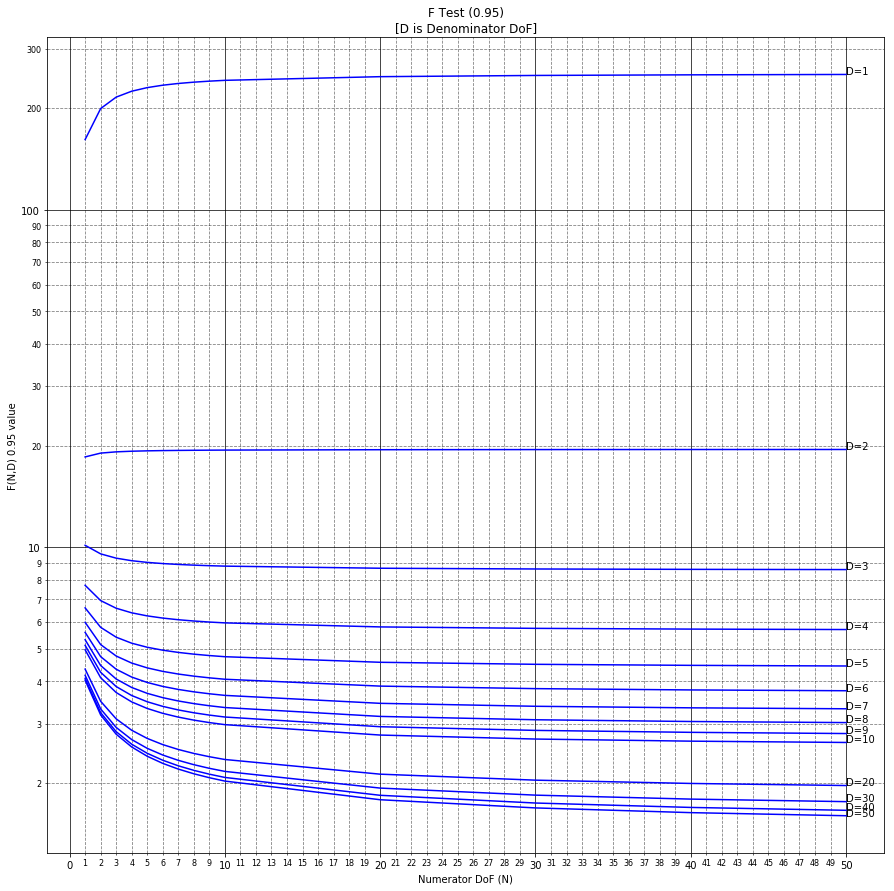

In [117]:
def show_f_chart(alpha=0.95):

    # 1
    steps = list(range(1, 10)) + list(range(10, 51, 10))

    # 2
    fig, ax = plt.subplots(figsize=(15, 15))

    # 3
    for denom in steps:
        f95 = [stats.f.ppf(alpha, i, denom) for i in steps]
        ax.plot(
            steps, f95, 'b-', label='F Denom ' + str(denom)
        )
        ax.text(steps[-1], f95[-1], 'D=' + str(denom))
    # end for

    # 4
    ax.set_yscale('log')

    # 5
    ax.minorticks_on()

    # 6
    ax.grid(True, axis='both', which='both')

    # 7
    ax.tick_params(axis='y', which='minor', labelsize=8)

    # 8
    ax.yaxis.set_minor_formatter(FormatStrFormatter('%d'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))

    # 9
    xminor = list(range(1, 51))
    for i in range(10, 51, 10):
        xminor.remove(i)
    # endfor

    # 10
    ax.set_xticks(xminor, minor=True)

    # 11
    ax.tick_params(axis='x', which='minor', labelsize=8)

    # 12
    ax.xaxis.set_minor_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

    # 13
    ax.set_xlabel('Numerator DoF (N)')
    ax.set_ylabel(f'F(N,D) {alpha} value')

    # 14
    ax.grid(
        which='major', alpha=0.9, color='k', axis='both'
    )

    # 15
    ax.grid(
        which='minor',
        linestyle='dashed',
        alpha=0.5,
        color='k',
        axis='both',
    )

    # 16
    ax.set_title(
        f'F Test ({alpha})\n[D is Denominator DoF]'
    )

    return ax


# end show_f_chart

_ = show_f_chart(0.95)

Same again, except for 99% confidence level

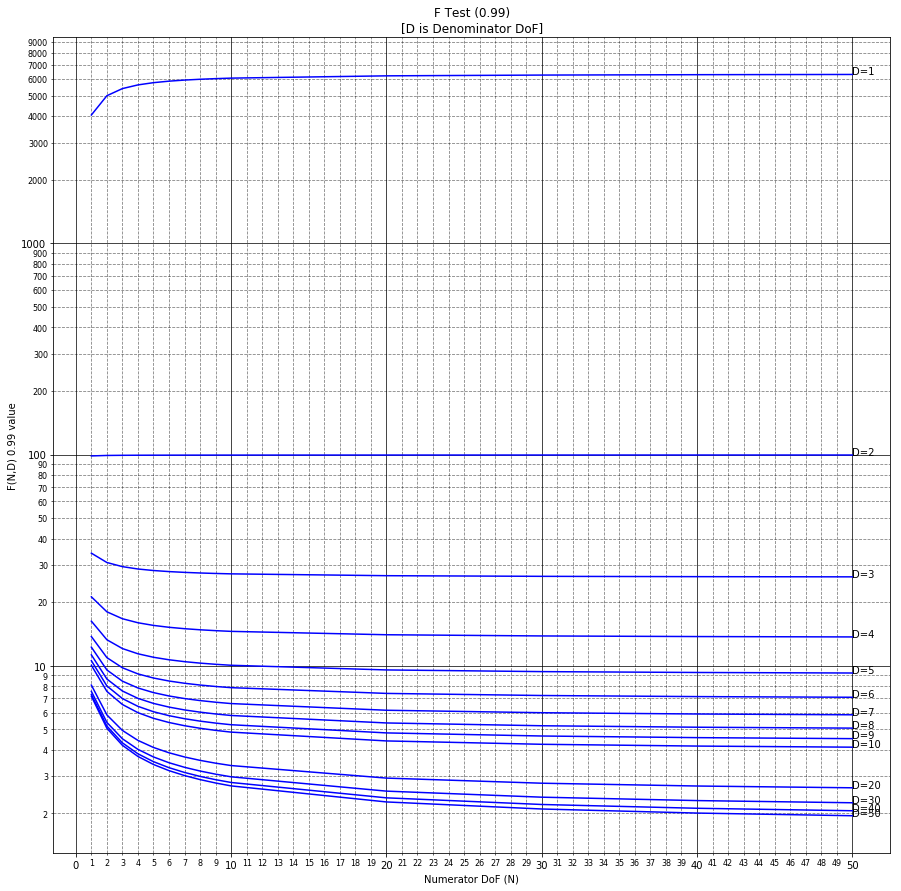

In [114]:
_ = show_f_chart(0.99)

-----
## T Statistic

We repeat the same steps for the T statistic, except that I was happy with the default minor divisions on the X axis

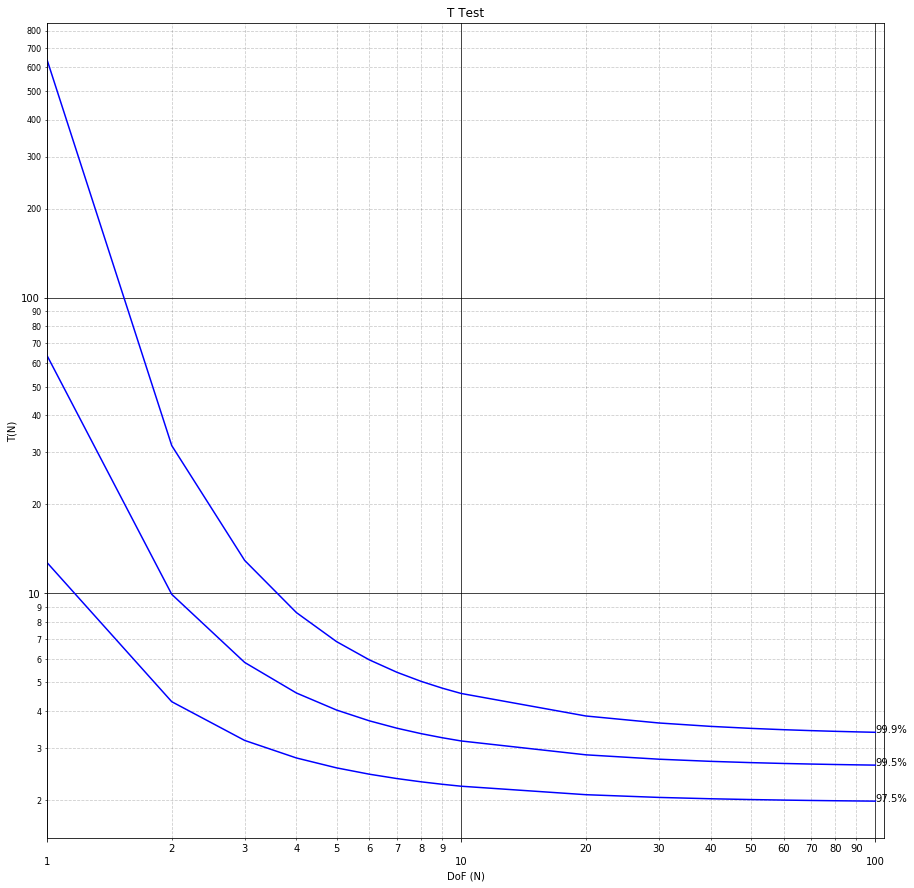

In [175]:
steps = list(range(1, 11)) + list(range(20, 101, 10))


fig, ax = plt.subplots(figsize=(15, 15))

# plt.ylim(bottom=1, top=100)
t99 = [stats.t.ppf(0.995, i) for i in steps]
t95 = [stats.t.ppf(0.975, i) for i in steps]
t999 = [stats.t.ppf(0.9995, i) for i in steps]

ax.plot(steps, t99, 'b-')
ax.plot(steps, t95, 'b-')
ax.plot(steps, t999, 'b-')


ax.text(steps[-1], t99[-1], '99.5%')
ax.text(steps[-1], t95[-1], '97.5%')
ax.text(steps[-1], t999[-1], '99.9%')

ax.set_xlim(left=1)

# 4
ax.set_yscale('log')
ax.set_xscale('log')

# 5
ax.minorticks_on()

# 6
ax.grid(True, axis='both', which='both')

# 7
ax.tick_params(axis='y', which='minor', labelsize=8)

# 8
ax.yaxis.set_minor_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))

# 12
ax.xaxis.set_minor_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_major_formatter(FormatStrFormatter('\n%d'))

# 13
ax.set_xlabel('DoF (N)')
ax.set_ylabel(f'T(N)')

# 14
ax.grid(which='major', alpha=0.9, color='k', axis='both')

# 15
ax.grid(
    which='minor',
    linestyle='dashed',
    alpha=0.2,
    color='k',
    axis='both',
)


ax.set_title('T Test')

----------
## CHI Squared Charts

This time, we use Tex in the Y axis labels to add a little bit of class.  As a bit of hackery, we label both ends of all lines, as some lines end below our Y axis limit

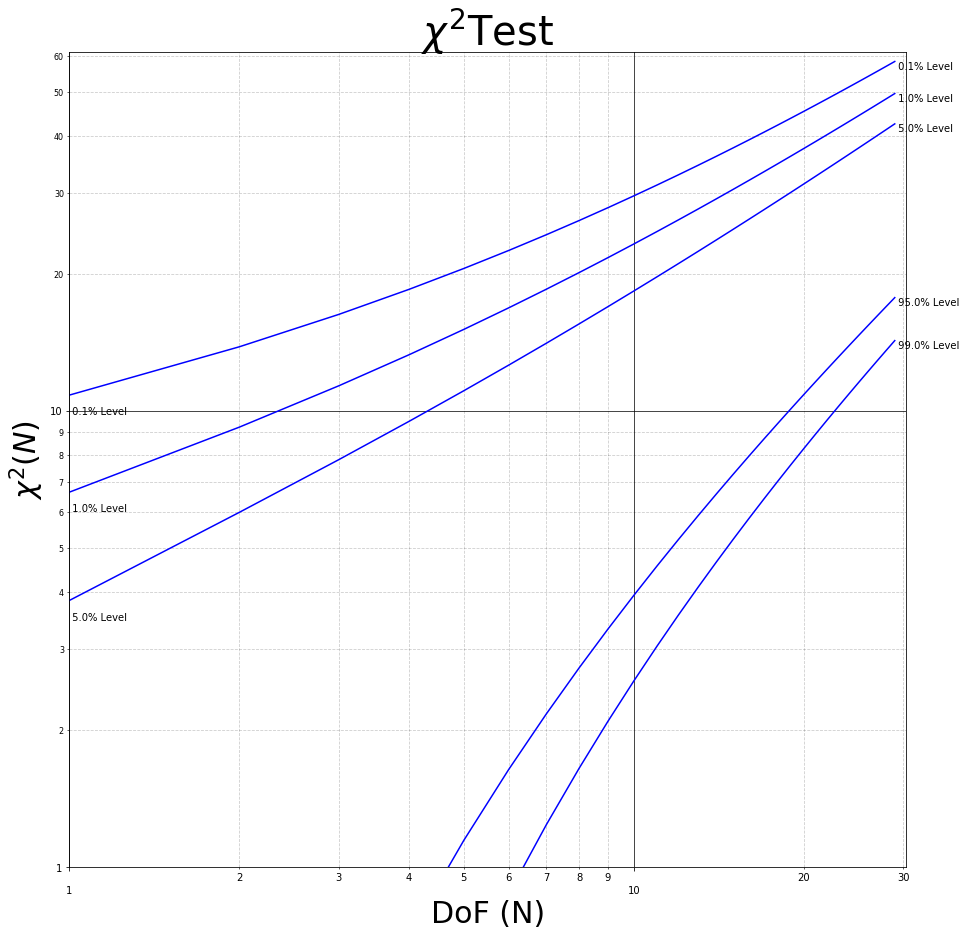

In [174]:
steps = list(range(1, 30))


fig, ax = plt.subplots(figsize=(15, 15))

ci_limits = [0.95, 0.99, 0.999, 0.05, 0.01]

for ci in ci_limits:
    chi2 = [stats.chi2.ppf(ci, i) for i in steps]
    ax.plot(steps, chi2, 'b-')
    if chi2[0] > 1:
        ax.text(
            steps[0],
            chi2[0],
            f'\n {1-ci:3.1%} Level',
            verticalalignment='top',
        )
    # end if
    ax.text(
        steps[-1],
        chi2[-1],
        f' {1-ci:3.1%} Level',
        verticalalignment='top',
    )

# end for


ax.set_xlim(left=1)
ax.set_ylim(bottom=1)

# 4
ax.set_yscale('log')
ax.set_xscale('log')

# 5
ax.minorticks_on()

# 6
ax.grid(True, axis='both', which='both')

# 7
ax.tick_params(axis='y', which='minor', labelsize=8)

# 8
ax.yaxis.set_minor_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))

# 12
ax.xaxis.set_minor_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_major_formatter(FormatStrFormatter('\n%d'))

# 13
ax.set_xlabel('DoF (N)', fontsize=30)
ax.set_ylabel('$\chi^2(N)$', fontsize=30)

# 14
ax.grid(which='major', alpha=0.9, color='k', axis='both')

# 15
ax.grid(
    which='minor',
    linestyle='dashed',
    alpha=0.2,
    color='k',
    axis='both',
)

ax.set_title('$\chi^2 $Test', fontsize=40)

-----
## Environment

In [171]:
%watermark -h -iv
%watermark

numpy       1.15.4
pandas      1.0.0
statsmodels 0.9.0
scipy       1.1.0
seaborn     0.9.0
matplotlib  3.0.2
host name: DESKTOP-SODFUN6
2020-04-04T16:26:05+10:00

CPython 3.7.1
IPython 7.2.0

compiler   : MSC v.1915 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 94 Stepping 3, GenuineIntel
CPU cores  : 8
interpreter: 64bit
